# Loading Images, Converting to Arrays and Splitting

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

from tensorflow.keras.preprocessing.image import load_img
from numpy import asarray
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow import keras
from PIL import Image

#ML Models
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

plt.rcParams['figure.figsize'] = (10, 10)

In [14]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [15]:
from tensorflow.keras import backend as K

K.clear_session()

In [16]:
X = []
y = []
classes = ['empty', 'bird', 'mug', 'sunglass']
base_path = 'imageclassifier/data/'

for i, target in enumerate(classes):
    files = os.listdir(base_path+target)  #gets the list of all files and directories in the specified directory
    for file in files:
        # load the image
        img = load_img(path=base_path+target+'/'+file,target_size=(224,224))
        # convert it to an array
        img_array = np.array(img)
        #processing the images
        processed_image = preprocess_input(img_array)
        # append the array to X
        X.append(processed_image)
        # append the numeric target to y
        y.append(i)

X = np.array(X)
y = np.array(y)

# No shuffle

In [17]:
X.shape, y.shape

((2155, 224, 224, 3), (2155,))

# Transfer learning from VGG 16 Model

## Initializing the model 

In [6]:
#Image Net is a database of 14 million hand annotated images

vgg_model = keras.applications.vgg16.VGG16(weights='imagenet') 

In [7]:
vgg_model.summary() #16 layers with weights, 13 convolutions.
                    #138 million parameters

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
f'VGG16 has {len(vgg_model.layers)} layers'

'VGG16 has 23 layers'

## Create a base model with Freezed layers

In [18]:
base_model = keras.applications.vgg16.VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

In [19]:
f'The base model has {len(base_model.layers)} layers'

'The base model has 19 layers'

In [20]:
# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Feature extraction + Logistic Regression:

In [21]:
out_features_vector = base_model.predict(X)

In [22]:
out_features_vector.shape

(2155, 7, 7, 512)

### To feed the Logistic Regression model, we need to flatten out_features_vector

In [24]:
X_reshaped = out_features_vector.reshape((2155,7*7*512))
X_reshaped.shape

(2155, 25088)

### Train Test Split

In [26]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_reshaped, y, test_size=.30,random_state=42)

### Train a Logistic Regression model

In [27]:
logi = LogisticRegression()
logi.fit(Xtrain,ytrain)

/home/esharifi/anaconda3/envs/deep_learning/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [28]:
ypred_train=logi.predict(Xtrain)
ypred_test = logi.predict(Xtest)

In [29]:
ypred_train

array([2, 0, 1, ..., 2, 2, 1])

In [32]:
ytrain

array([2, 0, 1, ..., 2, 2, 1])

### Validation

In [31]:
scores_train = cross_val_score(logi,Xtrain,ytrain,cv=10)
scores_train

/home/esharifi/anaconda3/envs/deep_learning/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/esharifi/anaconda3/envs/deep_learning/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99337748, 1.        , 0.99337748, 0.99333333, 1.        ])

In [33]:
print(f"accuracy score on train: {accuracy_score(ytrain,ypred_train)}")
print(f"accuracy score on test: {accuracy_score(ytest,ypred_test)}")

accuracy score on train: 1.0
accuracy score on test: 1.0


Text(0.5, 1.0, 'Train and Test Accuracy Scores')

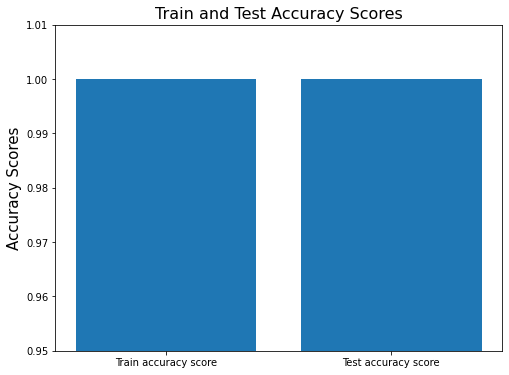

In [57]:
plt.figure(figsize=(8, 6))
x_plot = ['Train accuracy score', 'Test accuracy score']
y_plot = [1, 1]
plt.bar(x_plot, y_plot)
plt.ylim(0.95, 1.01)
plt.ylabel("Accuracy Scores", size=15)
plt.title('Train and Test Accuracy Scores', size=16)

Text(0.5, 1.0, 'Cross Validation Results')

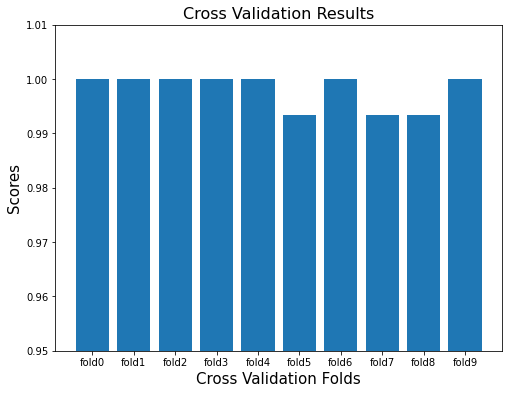

In [55]:
plt.figure(figsize=(8, 6))

x_plt= ['fold'+str(i) for i in range(10)]
y_plt = scores_train
plt.bar(x_plt, y_plt)
plt.ylim(0.95, 1.01)
plt.xlabel("Cross Validation Folds", size=15)
plt.ylabel("Scores", size=15)
plt.title('Cross Validation Results', size=16)


### Random Forest

In [58]:
import warnings
warnings.filterwarnings(action='ignore')

In [59]:
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=3, random_state=0)

In [60]:
ypred_train_rf=rf.predict(Xtrain)
ypred_test_rf = rf.predict(Xtest)

In [61]:
ypred_train_rf

array([2, 0, 1, ..., 2, 2, 1])

In [62]:
ytrain

array([2, 0, 1, ..., 2, 2, 1])

### Validation

In [63]:
scores_train_rf = cross_val_score(rf,Xtrain,ytrain,cv=10)
scores_train_rf

array([0.96688742, 0.9602649 , 0.95364238, 0.95364238, 0.95364238,
       0.9602649 , 0.92715232, 0.94039735, 0.91333333, 0.92666667])

In [64]:
print(f"accuracy score on train: {accuracy_score(ytrain,ypred_train_rf)}")
print(f"accuracy score on test: {accuracy_score(ytest,ypred_test_rf)}")

accuracy score on train: 0.9582228116710876
accuracy score on test: 0.9381761978361669


Text(0.5, 1.0, 'Cross Validation Results')

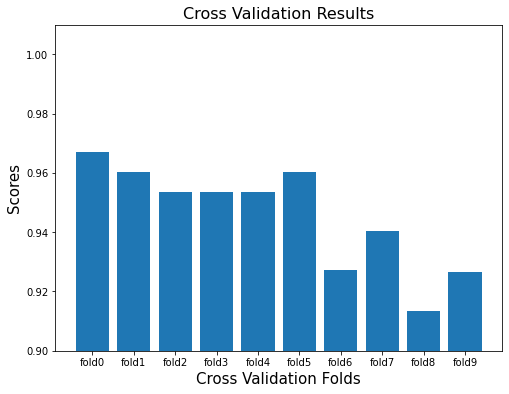

In [66]:
plt.figure(figsize=(8, 6))

x_plt= ['fold'+str(i) for i in range(10)]
y_plt = scores_train_rf
plt.bar(x_plt, y_plt)
plt.ylim(0.90, 1.01)
plt.xlabel("Cross Validation Folds", size=15)
plt.ylabel("Scores", size=15)
plt.title('Cross Validation Results', size=16)
